In [1]:
import matplotlib.pyplot as plt  # Impor library matplotlib untuk visualisasi data.
import seaborn as sns  # Impor library seaborn untuk visualisasi data yang lebih menarik.
sns.set()  # Mengatur gaya visualisasi dari seaborn.
import numpy as np  # Impor library numpy untuk operasi numerik.

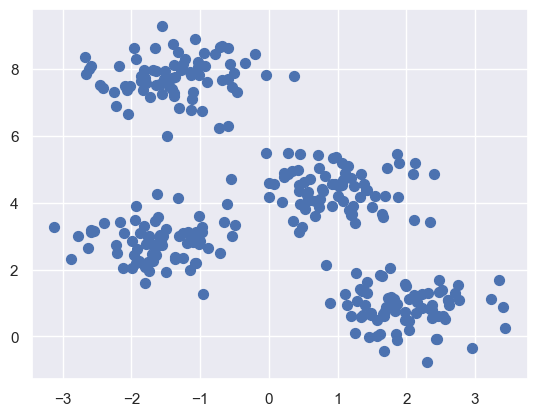

In [2]:
from sklearn.datasets import make_blobs  # Impor make_blobs dari sklearn.datasets untuk membuat data sampel.
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# Membuat data sampel dengan 300 titik, 4 pusat kluster, deviasi standar 0.60, dan random state 0.

plt.scatter(X[:, 0], X[:, 1], s=50)
# Menampilkan scatter plot dari data dengan sumbu x dari kolom pertama dan sumbu y dari kolom kedua, dengan ukuran titik 50.

In [3]:
from sklearn.cluster import KMeans  # Impor fungsi KMeans dari library scikit-learn.
kmeans = KMeans(n_clusters=4)  # Membuat model KMeans dengan 4 kluster.
kmeans.fit(X)  # Melatih model KMeans menggunakan data 'X'.
y_kmeans = kmeans.predict(X)  # Melakukan prediksi kluster pada data 'X' menggunakan model KMeans yang telah dilatih.

e:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


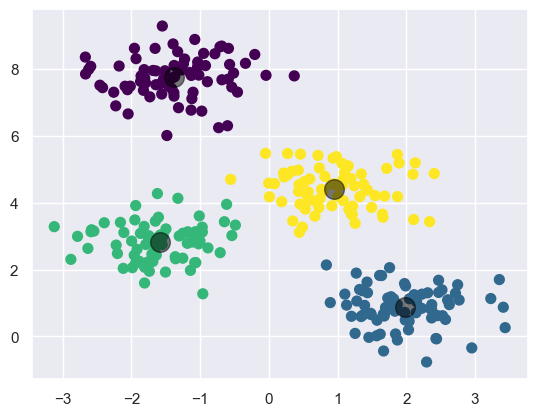

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
# Menampilkan scatter plot dari data dengan warna yang didasarkan pada hasil kluster 'y_kmeans', ukuran titik 50, dan menggunakan colormap 'viridis'.

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
# Menampilkan pusat-pusat kluster (centers) dengan warna hitam, ukuran titik 200, dan transparansi sebesar 0.5.

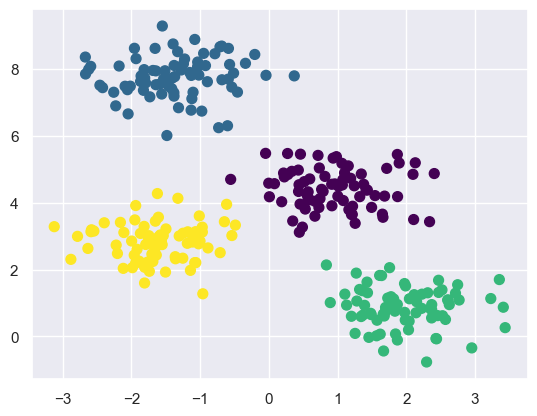

In [5]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis')

# Menampilkan scatter plot dari data dengan warna berdasarkan label kluster, ukuran titik 50, dan menggunakan colormap 'viridis'.

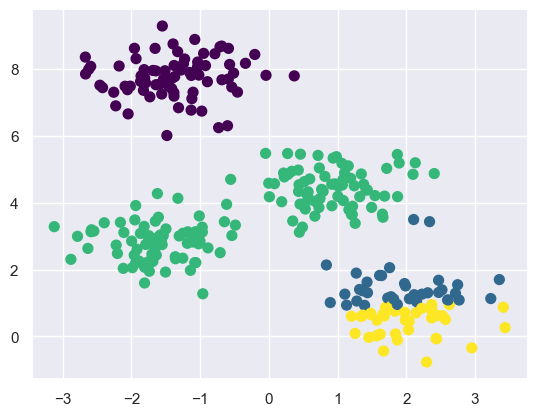

In [7]:
centers, labels = find_clusters(X, 4, rseed=0)
# Memanggil fungsi find_clusters untuk menemukan pusat kluster dan label dengan rseed=0.

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
# Menampilkan scatter plot dari data dengan warna berdasarkan label kluster, ukuran titik 50, dan menggunakan colormap 'viridis'.



e:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


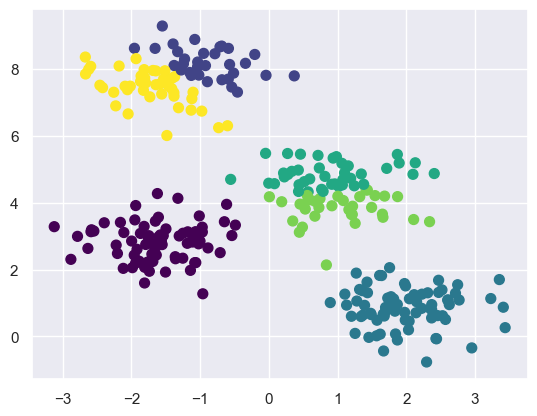

In [8]:
labels = KMeans(6, random_state=0).fit_predict(X)
# Menggunakan model KMeans dengan 6 kluster dan random state 0 untuk melakukan prediksi pada data 'X'.

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
# Menampilkan scatter plot dari data dengan warna berdasarkan label kluster, ukuran titik 50, dan menggunakan colormap 'viridis'.

In [9]:
# Batas Klaster yang Tidak Selalu Linier
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
# Membuat data dengan 200 sampel yang menyerupai dua bulan sabit (moons) dengan tingkat noise 0.05 dan random state 0.

e:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


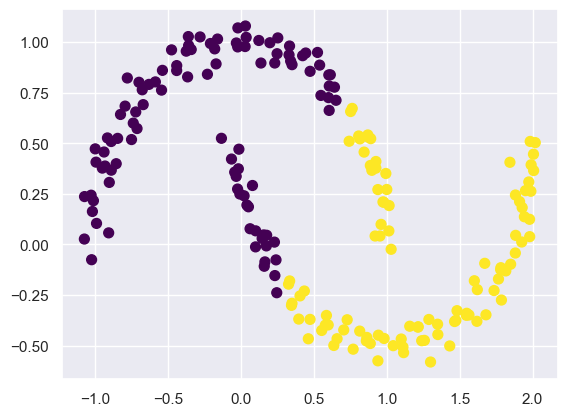

In [10]:
labels = KMeans(2, random_state=0).fit_predict(X)
# Menggunakan model KMeans dengan 2 kluster dan random state 0 untuk melakukan prediksi pada data 'X'.

plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');
# Menampilkan scatter plot dari data dengan warna berdasarkan label kluster, ukuran titik 50, dan menggunakan colormap 'viridis'.

e:\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
e:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


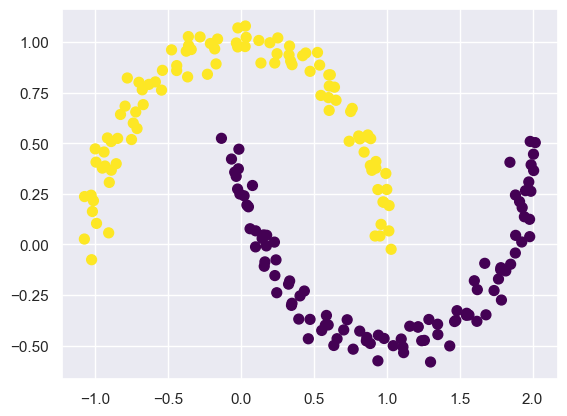

In [12]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
# Membuat model SpectralClustering dengan 2 kluster, menggunakan metode ketetanggaan terdekat (nearest_neighbors) untuk affinitas, dan label kluster dengan metode KMeans.

labels = model.fit_predict(X)
# Melakukan prediksi kluster menggunakan model SpectralClustering pada data 'X'.

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
# Menampilkan scatter plot dari data dengan warna berdasarkan label kluster, ukuran titik 50, dan menggunakan colormap 'viridis'.

In [13]:
# Contoh Kasus 1: Karakter Angka

from sklearn.datasets import load_digits
digits = load_digits()
# Memuat dataset digits, yang berisi gambar angka tulisan tangan.

digits.data.shape
# Menampilkan bentuk (shape) dari data dalam dataset digits.

(1797, 64)

In [16]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
# Membuat model K-Means dengan 10 kluster dan random state 0.

clusters = kmeans.fit_predict(digits.data)
# Melakukan prediksi kluster pada data gambar angka tulisan tangan dalam dataset 'digits'.

kmeans.cluster_centers_.shape
# Menampilkan bentuk (shape) dari pusat-pusat kluster yang dihasilkan oleh model K-Means.

e:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(10, 64)

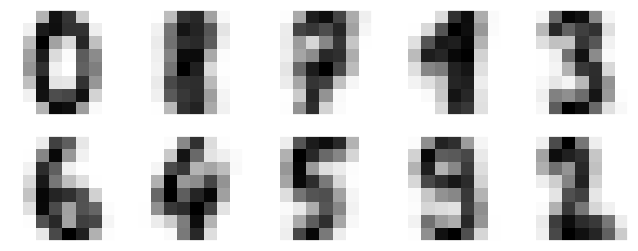

In [17]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
# Membuat subplot dengan 2 baris dan 5 kolom untuk menampilkan pusat-pusat kluster.
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
# Mengubah bentuk pusat-pusat kluster menjadi bentuk yang sesuai (10 gambar berukuran 8x8).

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    # Menghilangkan tanda sumbu x dan y pada setiap subplot.
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    # Menampilkan gambar pusat kluster dengan interpolasi terdekat dan colormap biner.

In [18]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
# Membuat array 'labels' yang memiliki bentuk yang sama dengan 'clusters' dan diisi dengan nilai 0.

for i in range(10):
    mask = (clusters == i)
    # Membuat mask (masker) yang menandai elemen-elemen dalam 'clusters' yang sama dengan i (kluster ke-i).

    labels[mask] = mode(digits.target[mask])[0]
    # Menggunakan mode untuk menentukan label yang paling umum dalam 'digits.target' yang sesuai dengan masker ini.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18016\89882623.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(digits.target, labels)
# Menggunakan accuracy_score dari scikit-learn untuk menghitung akurasi antara target sebenarnya (digits.target) dan label yang telah ditentukan (labels).

0.7918753478018921

Text(110.44999999999997, 0.5, 'predicted label')

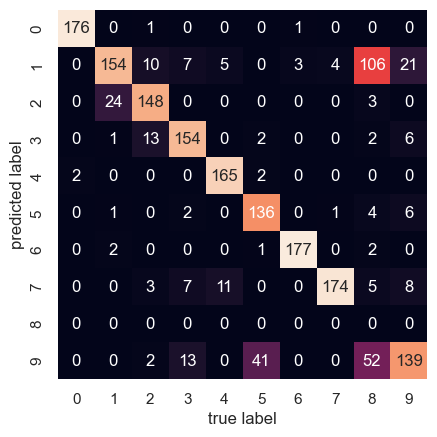

In [20]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
# Menghitung matriks kebingungan (confusion matrix) antara target sebenarnya (digits.target) dan label yang telah ditentukan (labels).

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
# Menampilkan heatmap dari matriks kebingungan. Heatmap ini ditransposisi (T), dibuat persegi (square), ditampilkan dengan anotasi (annot=True) dan format angka desimal (fmt='d').
# Juga ditampilkan tanpa color bar (cbar=False) dengan label sumbu x dan y berdasarkan 'digits.target_names'.

plt.xlabel('true label')
plt.ylabel('predicted label')
# Menambahkan label pada sumbu x (true label) dan sumbu y (predicted label).

In [21]:
from sklearn.manifold import TSNE

# Menerapkan t-SNE untuk mereduksi dimensi data
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)
# Menggunakan t-SNE untuk mengurangi dimensi data 'digits.data' menjadi 2 dimensi.

# Hitung klaster dengan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)
# Menggunakan K-Means untuk mengelompokkan data hasil t-SNE menjadi 10 kluster.

# Permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
# Menghitung label yang sesuai dengan setiap kluster dengan menggunakan mode dari target yang sesuai.

# Hitung akurasi
accuracy_score(digits.target, labels)
# Menghitung akurasi antara target sebenarnya (digits.target) dan label yang telah ditentukan (labels).

e:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18016\288986012.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


0.9415692821368948

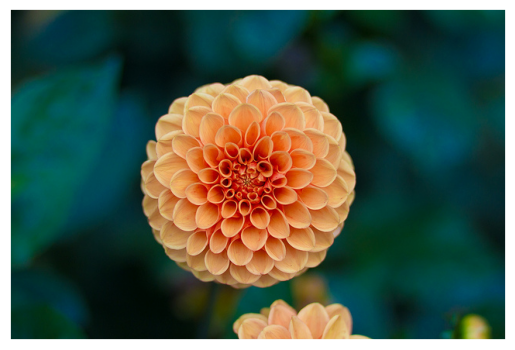

In [22]:
# Studi Kasus 2: Kompresi Citra

from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
# Memuat sampel gambar "flower.jpg" dari dataset sklearn.

ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)
# Menampilkan gambar "flower" tanpa sumbu x dan y.

In [23]:
flower.shape
# Mengambil bentuk (shape) dari gambar "flower".

(427, 640, 3)

In [24]:
data = flower / 255.0
# Mengonversi nilai piksel dalam gambar "flower" menjadi rentang [0, 1] dengan membaginya dengan 255.0.

data = data.reshape(427 * 640, 3)
# Merubah bentuk (shape) data menjadi bentuk yang sesuai, yaitu 3 dimensi untuk masing-masing piksel (427 * 640 piksel).

data.shape
# Mengambil bentuk (shape) dari data setelah perubahan bentuk.

(273280, 3)

In [25]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    # Jika warna tidak diberikan, maka gunakan data sebagai warna.

    # Memilih subset data secara acak
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    # Mengambil subset data acak sebanyak N baris, lalu mengambil komponen warna R, G, dan B dari subset data tersebut.

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    # Membuat subplot dengan 1 baris dan 2 kolom dalam satu gambar.

    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Merah', ylabel='Hijau', xlim=(0, 1), ylim=(0, 1))
    # Membuat scatter plot untuk komponen warna Merah dan Hijau dengan label sumbu x dan y.

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Merah', ylabel='Biru', xlim=(0, 1), ylim=(0, 1))
    # Membuat scatter plot untuk komponen warna Merah dan Biru dengan label sumbu x dan y.

    fig.suptitle(title, size=20)
    # Menambahkan judul keseluruhan gambar.

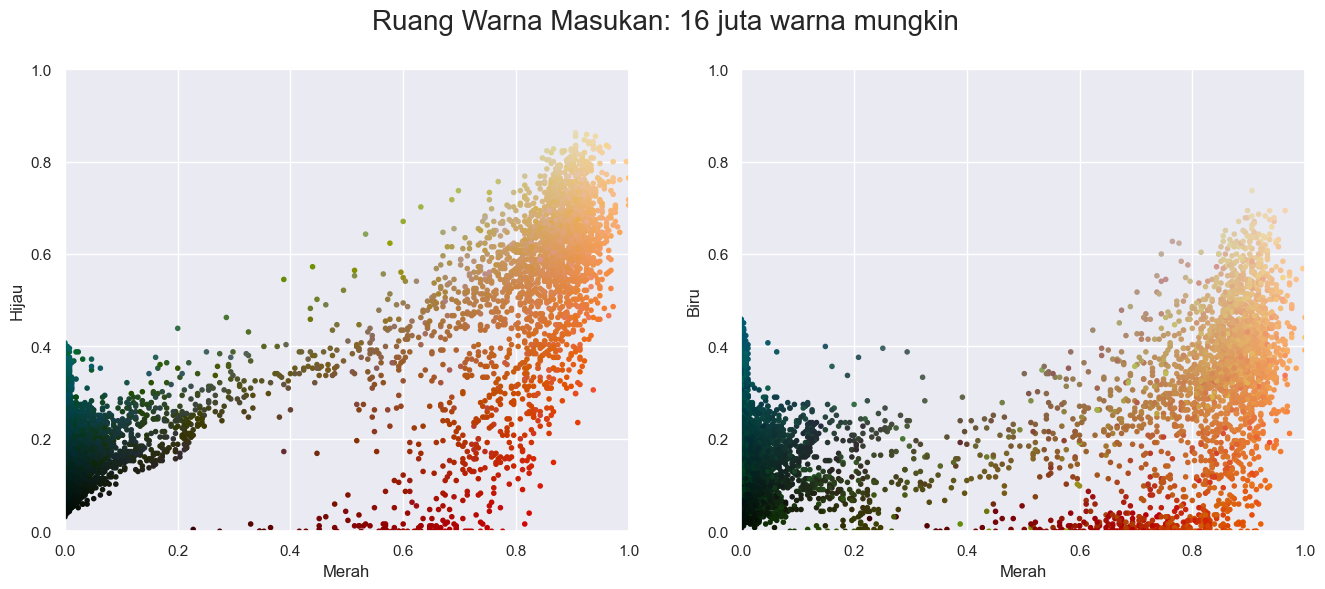

In [26]:
plot_pixels(data, title='Ruang Warna Masukan: 16 juta warna mungkin')
# Memanggil fungsi plot_pixels untuk membuat visualisasi dari data dengan judul 'Ruang Warna Masukan: 16 juta warna mungkin'.

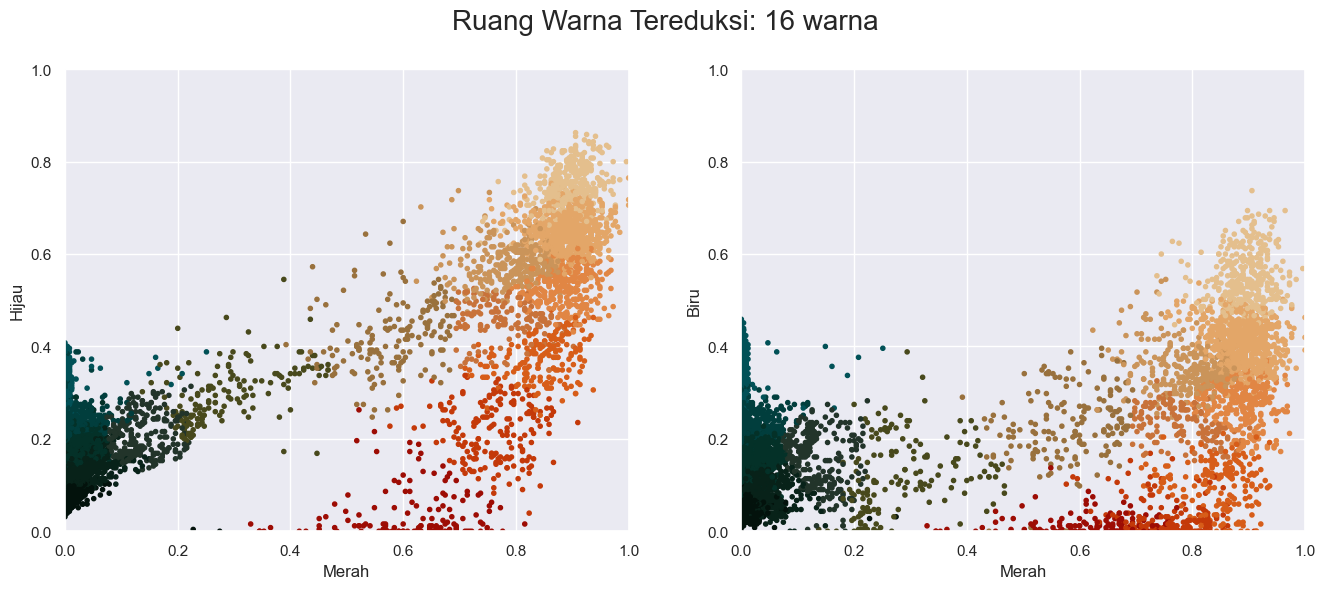

In [27]:
import warnings
warnings.simplefilter('ignore')  # Mematikan peringatan yang berkaitan dengan NumPy.

from sklearn.cluster import MiniBatchKMeans
# Mengimpor MiniBatchKMeans dari scikit-learn.

kmeans = MiniBatchKMeans(16)
# Membuat model MiniBatchKMeans dengan 16 kluster.

kmeans.fit(data)
# Melatih model MiniBatchKMeans pada data.

new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
# Menghitung warna baru berdasarkan pusat-pusat kluster yang telah diprediksi oleh model.

plot_pixels(data, colors=new_colors, title="Ruang Warna Tereduksi: 16 warna")
# Memanggil fungsi plot_pixels untuk membuat visualisasi dari data dengan warna yang telah direduksi menjadi 16 w

Text(0.5, 1.0, 'Gambar 16 Warna')

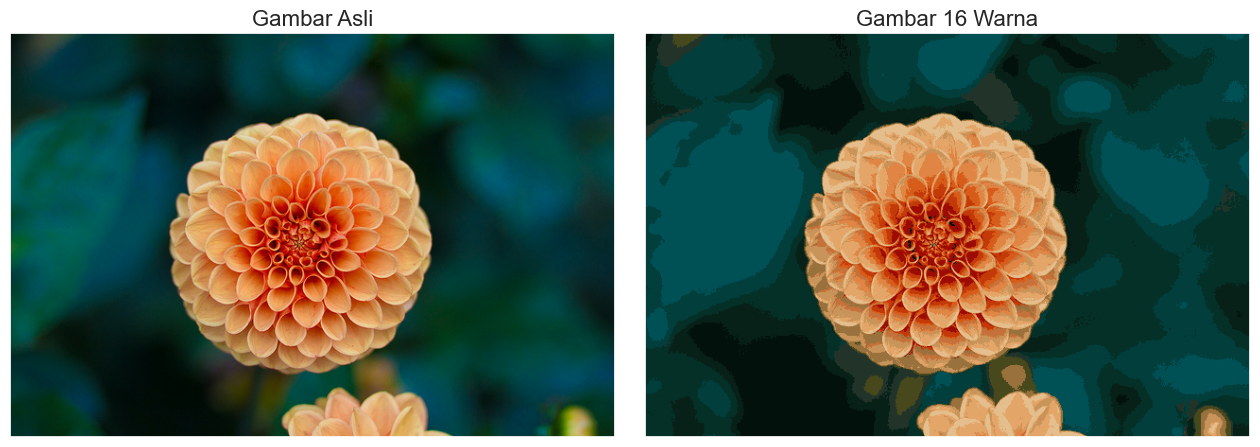

In [28]:
flower_recolored = new_colors.reshape(flower.shape)
# Mengubah bentuk (shape) warna baru menjadi bentuk yang sesuai dengan gambar "flower".

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
# Membuat subplot dengan 1 baris dan 2 kolom dalam satu gambar. Serta menghilangkan tanda sumbu x dan y.

fig.subplots_adjust(wspace=0.05)
# Mengatur jarak antara kedua subplot.

ax[0].imshow(flower)
ax[0].set_title('Gambar Asli', size=16)
# Menampilkan gambar asli dan menambahkan judul "Gambar Asli".

ax[1].imshow(flower_recolored)
ax[1].set_title('Gambar 16 Warna', size=16)
# Menampilkan gambar yang telah diubah warnanya menjadi 16 warna dan menambahkan judul "Gambar 16 Warn